Import libraries

In [28]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

Load model

In [5]:
model = torch.hub.load('ultralytics/yolov5','yolov5s') # can try using bigger models

c:\Users\teowe\anaconda3\envs\cv-object-detection\lib\site-packages\torch\hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\teowe/.cache\torch\hub\master.zip
YOLOv5  2023-1-23 Python-3.10.9 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 30.6MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 722

In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

Make detections

In [24]:
img = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSNvy543Mtm2j_F1JJ9SViEVSPT7ev6r8YETw&usqp=CAU"#"https://ultralytics.com/images/zidane.jpg"

In [25]:
results = model(img)
results.print()

image 1/1: 168x300 2 cats, 1 broccoli
Speed: 45.8ms pre-process, 67.9ms inference, 3.5ms NMS per image at shape (1, 3, 384, 640)


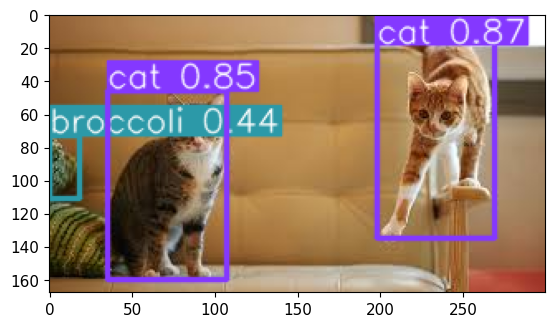

In [26]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [27]:
results.xyxy # bounding boxes

[tensor([[198.86771,   0.00000, 269.36816, 135.92188,   0.87270,  15.00000],
         [ 35.45274,  46.10463, 107.97350, 160.72656,   0.85272,  15.00000],
         [  0.29563,  73.00871,  18.73019, 111.04343,   0.44497,  50.00000]], device='cuda:0')]

Real Time Detections

In [29]:
cap = cv2.VideoCapture(0) # accessing webcam

while cap.isOpened(): # while capture device is open
    ret, frame = cap.read() #unpack variables to ret (return image) and frame/ image from webcam

    cv2.imshow('YOLO', frame) # pass through frame. pop up named 'YOLO'

    if cv2.waitKey(10) & 0xFF == ord('q'): # exiting condition: between frames whether or not we pressing q to quit
        break

cap.release() #release capture device i.e. webcam
cv2.destroyAllWindows() #destroy popup windows

In [40]:
cap = cv2.VideoCapture(0) # accessing webcam

while cap.isOpened(): # while capture device is open
    ret, frame = cap.read() #unpack variables to ret (return image) and frame/ image from webcam
    
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render())) # pass through frame. pop up named 'YOLO'

    if cv2.waitKey(10) & 0xFF == ord('q'): # exiting condition: between frames whether or not we pressing q to quit
        break

cap.release() #release capture device i.e. webcam
cv2.destroyAllWindows() #destroy popup windows

Train from scratch (using webcam)

In [33]:
import uuid
import os
import time

In [38]:
IMAGES_PATH = os.path.join('../data', 'images')
labels = ['cat', 'dog']
number_imgs = 20

In [39]:
cap = cv2.VideoCapture(0) # accessing webcam

for label in labels:
    print('Collecting images for {}'.format(labels))
    time.sleep(5)

    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        ret, frame = cap.read()

        imgname = os.path.join(IMAGES_PATH, f'{label}_{str(uuid.uuid1())}.jpg')
        cv2.imwrite(imgname, frame)
        cv2.imshow('Image Collection', frame)
        time.sleep(2)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release() 
cv2.destroyAllWindows() 

In [ ]:
# use labelImg, pyqt5, lxml

Fine-tuning (using images and pytorch)